In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure
from scipy import ndimage

C:\Users\Leyre\.conda\envs\IPDI\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#borde Exterior
def bordeExtGray(im,se):
    return (ndimage.grey_dilation(im, size = se.shape) - im)

#borde Interior    
def bordeIntGray(im,se):
    return (im - ndimage.grey_erosion(im, size = se.shape))

#Gradiente
def bGradienteGray(im,se):
    dilatacionGray = ndimage.grey_dilation(im, size = se.shape)
    erosionGray = ndimage.grey_erosion(im, size = se.shape)
    return np.subtract(dilatacionGray, erosionGray, dtype=np.float64)


In [3]:
def calculo_convolution(image1, kernel=np.ones((1,1))):
    convolved = np.zeros((np.array(image1.shape)-np.array(kernel.shape)+1))
    for x in range(convolved.shape[0]):
        for y in range(convolved.shape[1]):
            convolved[x,y] = (image1[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).sum()
    return convolved

In [4]:
def fcionLaplaciano(mR,filtro):
    matrizv4 = np.array([[0,-1, 0],[-1, 4,-1],[0,-1, 0]])
    matrizv8 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
    if filtro == 'fl':
        mAux=calculo_convolution(mR,matrizv4)
    else:
        mAux=calculo_convolution(mR,matrizv8)
        
    #mAux=np.clip(mAux,0,255)
    return mAux

In [5]:
def ms(img):
    
    # Find contours at a constant value of 0.8
    contours = measure.find_contours(img, 0.8)

    return contours

<Figure size 640x480 with 0 Axes>

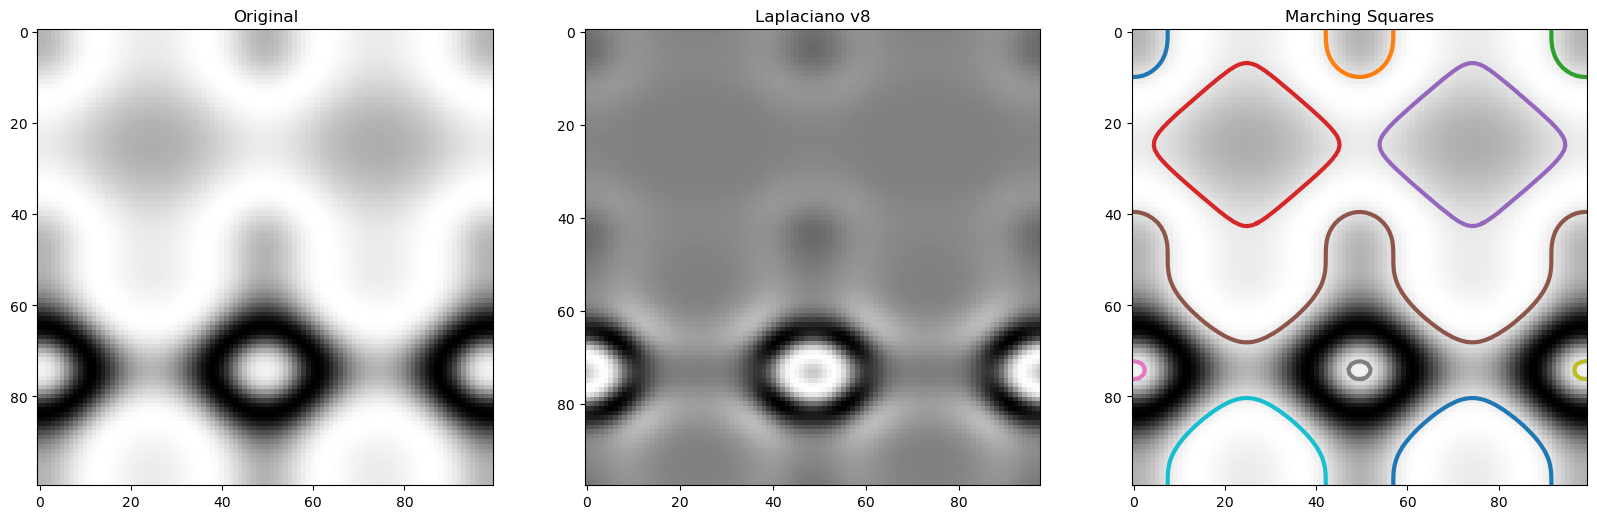

(100, 100)


<Figure size 640x480 with 0 Axes>

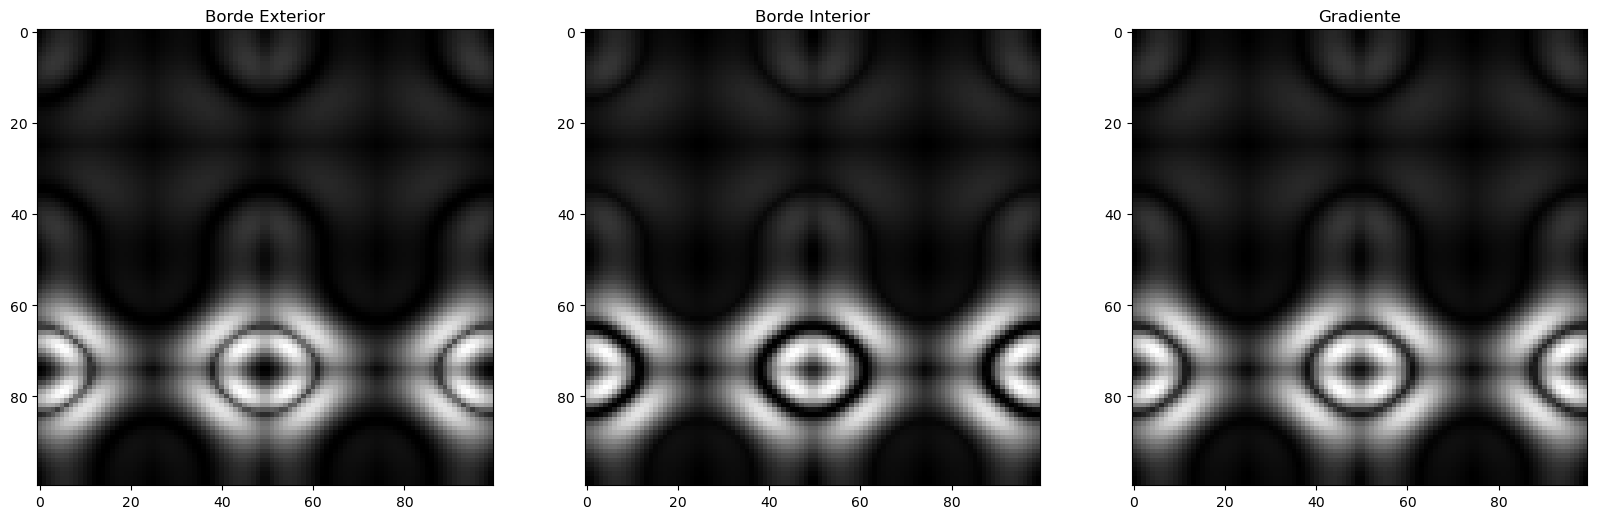

In [6]:
###Principal
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
img_P = np.sin(np.exp(np.sin(x)**3 + np.cos(y)**2))
se = np.ones((3,3),bool)

plt.figure(0)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20,20)
ax1.imshow(img_P,'gray')
ax1.set_title('Original')

ax2.imshow(fcionLaplaciano(img_P,'fl2'),'gray')
ax2.set_title('Laplaciano v8')

contours = ms(img_P)
# Display the image and plot all contours found
ax3.imshow(img_P, cmap=plt.cm.gray)

for contour in contours:
    ax3.plot(contour[:, 1], contour[:, 0], linewidth=3)
#ax3.imshow(ms(img_P),'gray')
ax3.set_title('Marching Squares')
plt.show()
print(img_P.shape)

plt.figure(1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20,20)
ax1.imshow(bordeExtGray(img_P,se),'gray')
ax1.set_title('Borde Exterior')

ax2.imshow(bordeIntGray(img_P,se),'gray')
ax2.set_title('Borde Interior')


ax3.imshow(bGradienteGray(img_P,se),'gray')
ax3.set_title('Gradiente')
plt.show()